In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2


In [2]:
img = cv2.imread("face-db/me/me-2.jpg", cv2.IMREAD_COLOR)

cv2.imshow("image1",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
me = ["face-db/me/me-1.jpg", "face-db/me/me-2.jpg","face-db/me/me-3.jpg",
     "face-db/me/me-4.jpg", "face-db/me/me-5.jpg", "face-db/me/me-6.jpg",
     "face-db/me/me-7.jpg", "face-db/me/me-8.jpg", "face-db/me/me-9.jpg"]

jung = ["face-db/jung/jung-1.jpg", "face-db/jung/jung-2.jpg", 
       "face-db/jung/jung-3.jpg", "face-db/jung/jung-4.jpg", 
       "face-db/jung/jung-5.jpg", ]

# FaceDetection

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


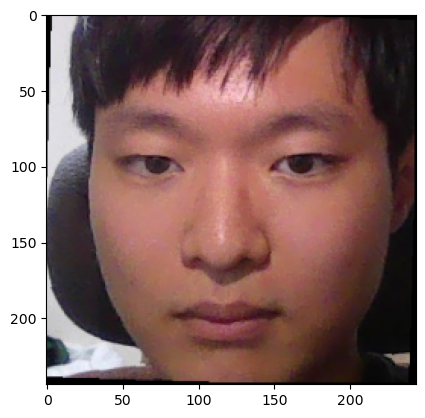

In [4]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]


face = DeepFace.detectFace('face-db/n9.jpg',
                   target_size=(244, 244),
                   detector_backend='opencv')

plt.imshow(face)

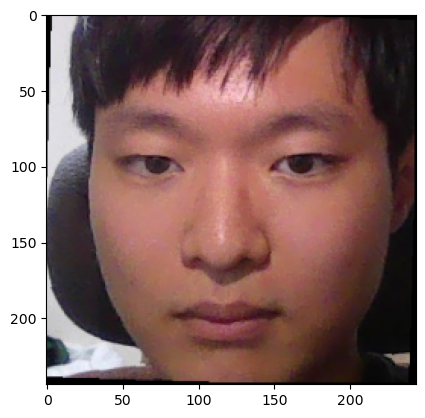

In [5]:
plt.imshow(face)

# Compare Detection Backends

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 120ms/step
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


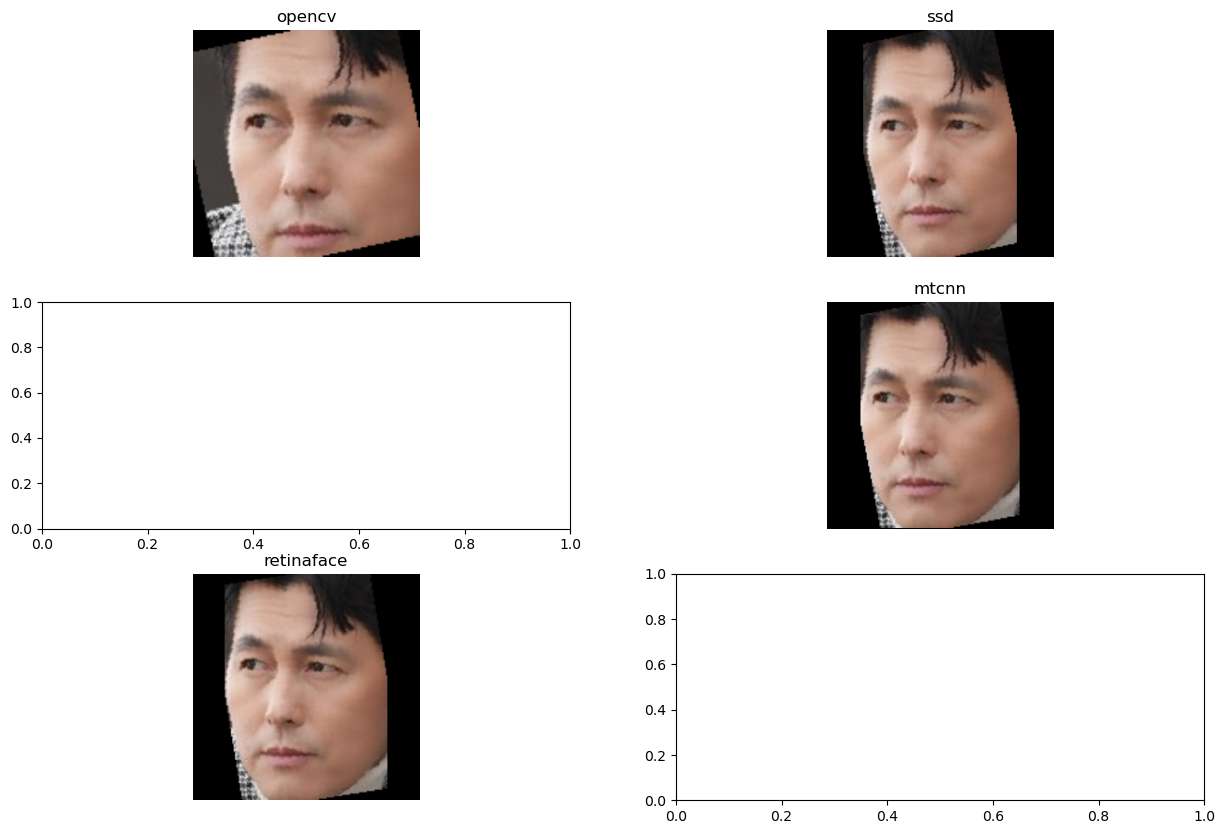

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.flatten()

for i, b in enumerate(backends):
    try:
        face = DeepFace.detectFace(
            "face-db/jung/jung-2.jpg", target_size=(244, 244), detector_backend=b
        )
        
        axs[i].imshow(face)
        axs[i].set_title(b)
        axs[i].axis("off")
    except:
        pass
    
plt.show()

# Face Verification

In [7]:
models = [
    "VGG-Face", 
    "Facenet", 
    "Facenet512", 
    "OpenFace", 
    "DeepFace",
    "ArcFace"]


#face verification
result  = DeepFace.verify(img1_path = me[0],
                         img2_path = "face-db/jung/jung-2.jpg",
                         model_name = models[0])



In [8]:
result

{'verified': True,
 'distance': 0.3679352332918626,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 122, 'y': 287, 'w': 589, 'h': 589},
  'img2': {'x': 562, 'y': 129, 'w': 138, 'h': 138}},
 'time': 2.31}

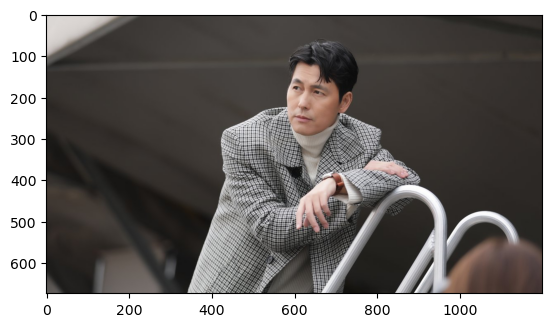

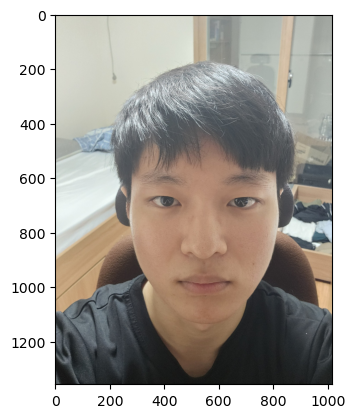

In [9]:
plt.imshow(plt.imread("face-db/jung/jung-2.jpg"))
plt.show()
plt.imshow(plt.imread("face-db/me/me-2.jpg"))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'face-db/me-emotions/e1.jpg'

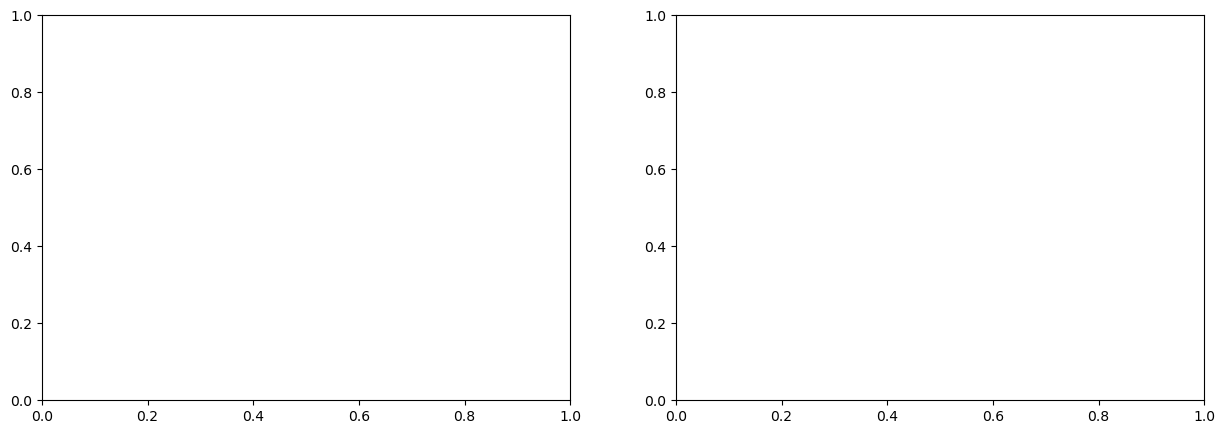

In [10]:
for model in models:

    result = DeepFace.verify(
        img1_path=me[0],
        img2_path=me[1],
        model_name=model)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(plt.imread("face-db/me-emotions/e1.jpg"))
    axs[1].imshow(plt.imread(me[1]))
    fig.suptitle(f"Verified {result['verified']} - Distance {result['distance']:0.4} : Model {model}")
    plt.show()
    

In [2]:
from deepface import DeepFace
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]

result = DeepFace.find(img_path="face-db/20200500/20200500_01.jpg", db_path="face-db/", detector_backend='opencv')
result

There are  30  representations found in  representations_vgg_face.pkl
find function lasts  1.7161707878112793  seconds


[                            identity  source_x  source_y  source_w  source_h  \
 0   face-db/20200500/20200500_01.jpg       456       308       299       299   
 1   face-db/20200500/20200500_02.jpg       456       308       299       299   
 2   face-db/20200500/20200500_08.jpg       456       308       299       299   
 3   face-db/20200500/20200500_25.jpg       456       308       299       299   
 4   face-db/20200500/20200500_23.jpg       456       308       299       299   
 5   face-db/20200500/20200500_03.jpg       456       308       299       299   
 6   face-db/20200500/20200500_06.jpg       456       308       299       299   
 7   face-db/20200500/20200500_22.jpg       456       308       299       299   
 8   face-db/20200500/20200500_24.jpg       456       308       299       299   
 9   face-db/20200500/20200500_11.jpg       456       308       299       299   
 10  face-db/20200500/20200500_04.jpg       456       308       299       299   
 11  face-db/20200500/202005

In [ ]:
result

# Face Attirbute Analysis

In [ ]:
result = DeepFace.analyze(img_path=me[0])

In [ ]:
result

In [ ]:
result = DeepFace.analyze(img_path=me[4])
result

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(result[0]["emotion"], index=[0]).T.plot(kind="bar")

In [ ]:
result[0]["emotion"]

# Run Facial Attribute Analysis on my Images

In [ ]:
from glob import glob

In [ ]:
def plot_img_emotion(img, emo_df, figsize=(15, 5)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].axis("off")
    axs[0].imshow(img)
    emo_df.sort_values("prediction").plot(kind="barh", figsize=figsize, ax=axs[1])
    plt.tight_layout()
    plt.show()

In [ ]:
imgs = glob("face-db/me-emotions/*")

for img in imgs:
    img = cv2.imread(img)
    demography = DeepFace.analyze(
        img_path = img, detector_backend = backends[4]
    )
    emo_df = pd.DataFrame(demography[0]["emotion"], index=[0]).T.rename(
        columns={0: "prediction"}
    )
    plot_img_emotion(img, emo_df)
    plt.show()

# Streaming API

In [5]:
DeepFace.stream(db_path="face-db/")

facial recognition model VGG-Face is just built
Age model is just built
Gender model is just built
Emotion model is just built
There are  23  representations found in  representations_vgg_face.pkl
find function lasts  0.2242107391357422  seconds


# Using MYSQL

데이터 집어넣기

In [43]:
import pymysql
from PIL import Image
import base64
from io import BytesIO
import datetime

now = datetime.datetime.now()
now_db = now.strftime('%Y-%m-%d %H:%M:%S')

conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

buffer = BytesIO()
im = Image.open("img_captured.png")
# im.show()

im.save(buffer, format='png')
# img_str = base64.b64encode(buffer.getvalue())
# img_str = img_str.decode('UTF-8')

sql = f"insert into detections (em_id, detect_date) \
    values (20200500, '{now_db}')"

cur.execute(sql)

conn.commit()

conn.close()


In [67]:
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x480 at 0x2120C6D1E20>


데이터 가져오기

In [36]:
import pymysql
from PIL import Image
import base64
from io import BytesIO

conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor(pymysql.cursors.DictCursor)

sql = "SELECT * from detections"

cur.execute(sql)
result = cur.fetchone()


print(type(result['detect_date']))

date = result['detect_date']


img_str = result['picture']

file_like = BytesIO(img_str)

print(type(file_like))

img = Image.open(file_like)
img.show()

print(img)

conn.close()


<class 'datetime.datetime'>
<class '_io.BytesIO'>


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002A80E85EB30>

In [93]:
im = Image.open("img_captured.png")
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=640x480 at 0x2120C6D1820>


In [86]:
import io

In [11]:
import datetime

now = datetime.datetime.now()

print(type(now))

<class 'datetime.datetime'>


In [8]:
print(date)
print(now)

2023-12-03 10:04:19
2023-12-03 18:42:59.938103


# Pyserial로 아두이노 연동

In [25]:
import serial
import time

arduino = serial.Serial('COM6', 9600)

switch = False


while True:
    data = arduino.readline().decode().strip()

    if data.startswith("AQ"):
        # Split the line into two parts: "QA" and the actual data
        parts = data.split(',')
        alcohol_data = float(parts[0][2:])
        air_quality_data = float(parts[1][4:])
        
        print("알코올 센서:", alcohol_data)
        print("공기질 센서:", air_quality_data)
        print("Sleep 5 seconds")
        time.sleep(5)
        
        if air_quality_data >= 4.5 and not switch:
            print("switch on")
            switch = True
            
        if air_quality_data < 3.7 and switch:
            print("switch off")
            switch = False
    




알코올 센서: 0.0
공기질 센서: 3.45
Sleep 5 seconds
알코올 센서: 0.0
공기질 센서: 3.45
Sleep 5 seconds
알코올 센서: 0.0
공기질 센서: 3.45
Sleep 5 seconds
알코올 센서: 0.0
공기질 센서: 3.45
Sleep 5 seconds


KeyboardInterrupt: 

In [26]:
arduino.close()

In [41]:
print(type(air_quality_data))

<class 'float'>


In [40]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt

pivot_img_size = 112

x = 610
y = 30

text_color = (255,255,255)


cap = cv.VideoCapture(0)
pivot_img_size = 112

result = 0
matching_img = 0
display_img = None


if not cap.isOpened():
    print("camera open failed")
    exit()
while True:
    ret, img = cap.read()
    label = None
    if not ret:
        print("Can;t read camera")
        break
        
    if display_img is not None:
        img[
            y : y + pivot_img_size,
            x - pivot_img_size  : x,
        ] = display_img
        
        cv.rectangle(
            img,
            (x - pivot_img_size , y + pivot_img_size),
            (x, y + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        cv.putText(
            img,
            label,
            (x - pivot_img_size , y + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
        
    
    if cv.waitKey(1) == ord('c'):
        img_captured = cv.imwrite('img_captured.png', img)
        try:
            source_objs = DeepFace.extract_faces(
                img_path="img_captured.png",
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend="opencv",
                align=False,
            )
            
            

            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            
            
            
        except:
            print("face couldn't be detected")
            display_img = None
            pass
    if cv.waitKey(1) == ord('q'):
        break
        

    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

In [3]:
# 필요한 패키지 import
import cv2  # OpenCV(실시간 이미지 프로세싱) 모듈

# 카메라 index 번호
camera = 0

# VideoCapture : 카메라 열기
capture = cv2.VideoCapture(camera)

# 원본 동영상 크기 정보
w = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
h = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("원본 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))


# 동영상 크기 변환
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1280) # 가로
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 720) # 세로

# 변환된 동영상 크기 정보
w = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
h = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print("변환된 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))


while True:
    # read : 프레임 읽기
    # [return]
    # 1) 읽은 결과(True / False)
    # 2) 읽은 프레임
    retval, frame = capture.read()

    # 읽은 프레임이 없는 경우 종료
    if not retval:
        break
    
    # 프레임 출력
    cv2.imshow("resize_frame", frame)
    
    # 'q' 를 입력하면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 동영상 파일 또는 카메라를 닫고 메모리를 해제
capture.release()

# 모든 창 닫기
cv2.destroyAllWindows()


원본 동영상 너비(가로) : 640.0, 높이(세로) : 480.0
변환된 동영상 너비(가로) : 1280.0, 높이(세로) : 720.0


In [1]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

import pymysql
from datetime import datetime

# pip install pyserial 을 해야한다.
# 안되면 serial uninstall을 해서라도
import serial


# db에 연결할 기본적인 코드들
conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

# 아두이노 연동 코드
# 'COM6'는 컴퓨터에 따라 다르게 입력하자
arduino = serial.Serial('COM6', 9600)

# 공기질에 따라 캡처를 한 번만 하기 위한 변수
switch = False

# 오른쪽 위에 일치하는 그림의 사이즈를 뜻함
pivot_img_size = 224

# 일치하는 그림의 위치 변수
x_match = 500
y_match = 30


text_color = (255,255,255)

# 동영상 촬영 시작
cap = cv.VideoCapture(0)

# while내에 쓰일 변수들을 전역변수로
faces=[]
result = 0
matching_img = 0
display_img = None
label = None
data = None

backend = "opencv"


# 동영상이 열리지 않는다면
if not cap.isOpened():
    print("camera open failed")
    exit()
    
# 동영상이 열렸다면 아래 코드를 무한 반복(Q입력 전까지) C입력시 캡쳐
while True:
    # 이미지를 읽는다.
    ret, img = cap.read()
    
    #나중을 위해 그냥 이미지만을 복사한다.
    raw_img = img.copy()
    
    # ret은 이미지가 읽어졌는지의 여부를 반환한다.
    if not ret:
        print("Can;t read camera")
        break
        
    # 아두이노 또한 지속적으로 데이터를 읽는다. 계속 읽지 않으면 쌓이기 때문
    # 그렇게 되면 데이터가 뒤로 밀리게 된다.
    try: 
        data = arduino.readline().decode().strip()
    except:
        pass

        
    
    
    # C를 눌러야만 캡쳐가 된다.
    if cv.waitKey(1) == ord('c'):
        
        
        
        # 쳐된 이미지를 저장한다. (뭘 반환하는지는 잘 모름)
        img_captured = cv.imwrite('img_captured.png', raw_img)
        
        # 현재 시간을 저장한다.
        now = datetime.now()
        # 파일명으로 : 는 들어갈 수 없으므로 시간은 _로 나누어준다.
        now_db = now.strftime('%Y-%m-%d %H:%M:%S')
        now_str = now.strftime('%Y-%m-%d %H_%M_%S')
        
        # 해보고 안되면 face를 찾을 수 없다는 뜻
        try:
            # 현재 카메라의 얼굴과 face-db폴더 내부의 얼굴을 비교해서 결과값을 반환
            result = DeepFace.find(
                img_path=raw_img, 
                db_path="face-db/", 
                detector_backend=backend,
                silent=True
            )
            print(result)
            # 가장 일치하는 값은 배열의 0번째에 pandas형태로 저장되어있다.
            pd_data = result[0]
            
            # pandas에서 일치하는 얼굴 이미지의 파일명을 불러온다.
            matching_image =  pd_data.at[0, 'identity']
            
            # 일치한 파일 이미지에서 얼굴만을 추출한다.(오른쪽 위에 배치하기 위해)
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend=backend,
                align=False,
            )
            
            
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            

                
            
            
            # 파일명에서 학번(사원번호?)만을 추출한다.
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            
            
            # 시험을 위해 출력한거임
            # print(img_name)
            
            
            # just extract the regions to highlight in webcam
            face_objs = DeepFace.extract_faces(
                img_path=raw_img,
                detector_backend=backend,
            )
            print("try successed")
            faces = []
            for face_obj in face_objs:
                facial_area = face_obj["facial_area"]
                faces.append(
                    (
                        facial_area["x"],
                        facial_area["y"],
                        facial_area["w"],
                        facial_area["h"],
                    )
                )
            print(faces)
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = face_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            
            
            # 알코올, 공기질 얻기
            # 그와 동시에 조건문으로 sql넣기
            print(data)
            
            # Serial에서 받아온 데이터를 읽어들인다.
            # 아두이노에서 출력하기를 AQ000, QAir000 로 출력하게 된다.(왠진 모름)
            # 즉 AQ부터 시작해야 진짜 데이터이다.
            if data.startswith("AQ"):
                # Split the line into two parts: "QA" and the actual data
                parts = data.split(',')
                alcohol_data = float(parts[0][2:])
                air_quality_data = float(parts[1][4:])

                print("알코올 센서:", alcohol_data)
                print("공기질 센서:", air_quality_data)
                
                # 입냄새 4.3이상 센싱되어야만, 단 한번만(3.7미만으로 내려가기전까지)
                if air_quality_data >= 4.3 and not switch:
                    print("switch on")
                    
                    # SQL문 실행 
                    sql = f"insert into inspections(em_id, human_breath, alcohol, detect_date) \
                    values ({label}, {air_quality_data}, {alcohol_data},'{now_db}')"
                    cur.execute(sql)
                    conn.commit()
                    
                    # 이미지를 저장한다. DB에 저장할 수 없으니 파일로 저장한다.
                    # img_name은 이미지 이름으로 학번_시간.png 형태이다.
                    img_name = f"records\{label}_{now_str}.png"
                    df_img_name = rf"..\..\..\..\xampp\htdocs\records\{label}_{now_str}.png"
                    cv.imwrite(df_img_name, raw_img)
                    
                    
                    # 이미지 저장
                    cv.imwrite(img_name, raw_img)
                    
                    switch = True
                    
                    
                # 3.7 이하가 되어야지 다시 SQL문 실행 가능
                if air_quality_data < 3.7 and switch:
                    print("switch off")
                    switch = False


            
            
        except:
            print("face couldn't be detected or unindentified face")
            display_img = None
            label = None
            faces = []
            pass
    if cv.waitKey(1) == ord('q'):
        arduino.close()
        break
        
    
    for x, y, w, h in faces:
        if w > 130:  # discard small detected faces
            cv.rectangle(
                img, (x, y), (x + w, y + h), (144, 238, 144), 1
            )  # draw rectangle to main image
        
        # 후에 카메라에 있는 얼굴과 일치하는 얼굴이 있다면 display_img에 들어간다.
    if display_img is not None:
        # 이미지 배치
        img[
            y_match : y_match + pivot_img_size,
            x_match - pivot_img_size  : x_match,
        ] = display_img
        
        # 사각형 배치(위에 글자 올리려고)
        cv.rectangle(
            img,
            (x_match - pivot_img_size , y_match + pivot_img_size),
            (x_match, y_match + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        # 글자 배치(사각형 위에)
        cv.putText(
            img,
            label,
            (x_match - pivot_img_size , y_match + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

conn.close()
arduino.close()

In [47]:
arduino.close()

In [38]:
print(face_objs[0]['face'])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
